In [17]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import svm
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs, make_circles

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Linear com linear

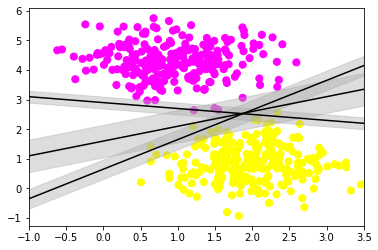

In [38]:
X, y = make_blobs(n_samples=500, centers=2,
                  random_state=0, cluster_std=0.60)

xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')

# Draw three lines that couple separate the data
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

In [39]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (400, 2) (400,)
Test set: (100, 2) (100,)


In [40]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [41]:
y_pred = clf.predict(X_test)

In [16]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[47  0]
 [ 0 53]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        53

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

1.0


### Círculo com linear

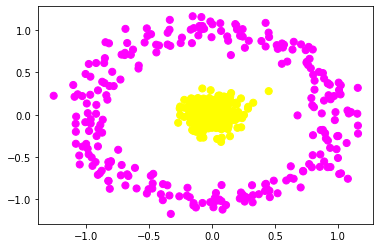

In [47]:
X, y = make_circles(500, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')

In [48]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

clf = SVC(kernel='linear').fit(X_train, y_train)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (400, 2) (400,)
Test set: (100, 2) (100,)


In [49]:
y_pred = clf.predict(X_test)

In [50]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[16 35]
 [ 0 49]]
              precision    recall  f1-score   support

           0       1.00      0.31      0.48        51
           1       0.58      1.00      0.74        49

    accuracy                           0.65       100
   macro avg       0.79      0.66      0.61       100
weighted avg       0.80      0.65      0.60       100

0.65


In [51]:
clf = SVC(kernel='rbf')

In [52]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

clf.fit(X_train, y_train)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (400, 2) (400,)
Test set: (100, 2) (100,)


In [53]:
y_pred = clf.predict(X_test)

In [54]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[51  0]
 [ 0 49]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        49

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

1.0


In [70]:
m = 200
x1 = np.linspace(-1.5,1.5,m)
x2 = np.linspace(-1.5,1.5,m)

C = np.zeros((m,m))

for i in range(m):
    for j in range(m):
        C[j][i] = clf.predict([[x1[i],x2[j]]])


## Fronteiras de decisão

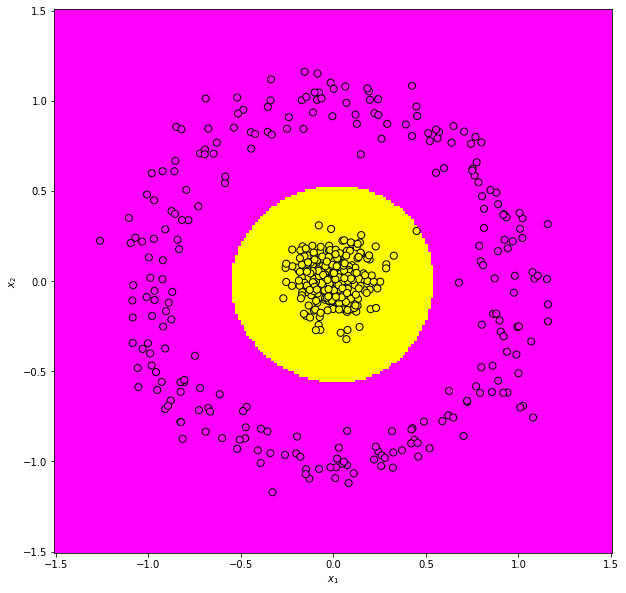

In [71]:
plt.figure(figsize=(10,10))
plt.pcolor(x1,x2,C, cmap='spring')
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring', edgecolors='black')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.show()